# 教師あり学習(分類)
教師あり学習は、正解ラベル付きの学習データからモデルを学習させ、未知のデータに対して予測</br>
カテゴリ別に分けてあるデータを学習し、未知のデータのカテゴリを予測</br>
例: メールのスパム判定(スパムかスパムでないか、カテゴリを予測)</br>


## 二項分類と多項分類
- 二項分類（二値分類、２クラス分類）
  - 分類するカテゴリー(クラスといいます)が２つの分類を指す
  - データを直線で識別できる場合は線形分類、そうでない場合は非線形分類
- 多項分類（多クラス分類）
  - 分類するクラスが３つ以上の分類を指す


## 分類の流れ
1. データの前処理
   1. データの整形、操作
2. アルゴリズムの選択
   2. アルゴリズムを選択
   2. モデルの作成
3. モデルの学習
   3. モデルの精度検証
   3. チューニングをするハイパーパラメーターの選択
   3. パラメーターのチューニング
4. モデルによる予測（推論)
   4. 未知のデータを使ったテスト
   4. WEBサービスなどに組み込み、AIモデルを実運用

![](./images/unsupervised_learning_flow.png)


## データを用意する方法1
分類に適した架空のデータを作成するscikit-learn.datasetsモジュールの make_classification()を利用

```python
make_classification(n_samples=XX, 
                    n_classes=XX, 
                    n_features=XX, 
                    n_redundant=XX, 
                    random_state=XX)
```
- n_samples
  - 用意するデータの個数
- n_classes
  - クラス数: default=2
- n_features
  - データの特徴量の個数
- n_redundant
  - 分類に不要な特徴量（余分な特徴量）の個数
- random_state
  - 乱数のシード（乱数のパターンを決定する要素）

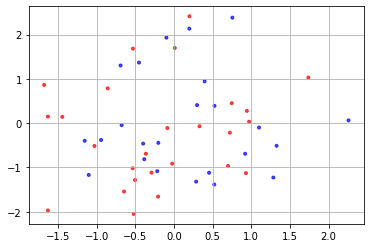

In [18]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import matplotlib

# データX, ラベルyを生成
X, y = make_classification(n_samples=50, n_classes=2, random_state=0)
# y=0となるXの座標を青くプロット
# y=1となるXの座標を赤くプロット
plt.scatter(X[:, 0], X[:, 1], c=y, marker=".",
            cmap=matplotlib.cm.get_cmap(name="bwr"), alpha=0.7)
plt.grid(True)
plt.show()

## データを用意する方法2
scikit-learnライブラリにはデータの前処理やモデルの調整・評価を行うための関数

- irisデータ
  - がく片の長さ
  - がく片の幅
  - 花びらの長さ
  - 花びらの幅

４つの特徴量(単位はcm)と、3種の品種(0~2)が格納されている</br>
![](./images/features.png)


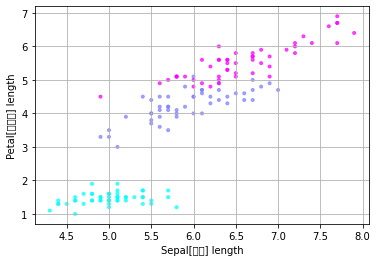

In [28]:
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib

iris = datasets.load_iris()
# irisの 0列目=がくの長さ,2列目=花びらの長さ を格納
X = iris.data[:, [0,2]]
# irisのクラスラベルを格納
y = iris.target

# データの色付け、プロット
# plt.scatter(x,           The data positions x axis.
#             y,           The data positions y axis
#             c=None,      The marker colors
#             marker=None, The marker style
#             alpha=None,  The alpha blending value, between 0 (transparent) and 1 (opaque)
# )
plt.scatter(X[:, 0], X[:, 1], c=y, marker=".",
            cmap=matplotlib.cm.get_cmap(name="cool"), alpha=0.7)
plt.xlabel("Sepal[がく] length")
plt.ylabel("Petal[花びら] length")
plt.grid(True)
plt.show()

In [29]:
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib

iris = datasets.load_iris()
print(len(iris.target), len(iris.data[:, 0]))
# y = iris.target

150 150


## 学習と予測
トレーニングされたモデルの性能を評価するために、データセットを訓練データと検証データに分割</br>
以下のように、scikit-learnのmodel_selectionモジュールのtrain_test_split()を使用して、</br>
X配列とy配列を30%の検証データと70%の訓練データにランダムに分割

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# データの生成
X, y = make_classification(n_samples=100, n_features=2,
                           n_redundant=0, random_state=42)
# 学習/検証用に分割
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)
# モデルの構築
model = LogisticRegression(random_state=42)
# train_Xとtrain_yを使ってモデルに学習
model.fit(train_X, train_y)

# test_Xに対するモデルの分類予測結果を格納
pred_y = model.predict(test_X)

print("Predicted value :"+ str(pred_y))
print("Correct data    :"+ str(test_y))
print("Acuraccy        : {} %".format(accuracy_score(test_y, pred_y)))
print("Precision       : {} %".format(precision_score(test_y, pred_y)))
print("Recall          : {} %".format(recall_score(test_y, pred_y)))
print("F-Value         : {} %".format(f1_score(test_y, pred_y)))

Predicted value :[0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1]
Correct data    :[0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1]
Acuraccy        : 0.96 %
Precision       : 0.9166666666666666 %
Recall          : 1.0 %
F-Value         : 0.9565217391304348 %


# Multiple Ways For Suppervised Learning(分類)

## ロジスティック回帰
線形分離可能なデータの境界線を学習によって見つけて、データの分類を行う手法</br>

直線でデータのカテゴリーのグループ分けができるデータを線形分離可能なデータ</br>
この線形分離可能なデータをロジスティック回帰を用いて分類する

- Cons
  - データが線形分離可能でないと分類ができない点
  - ⾼次元の疎なデータ(0が多いデータ)には適さない点
  - 訓練データから学習した境界線がデータの近くを通るため、汎化能力が低い点

![np.meshgrid](./images/np.meshgrid.png)


Predicted value :[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Correct data    :[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Acuraccy        : 1.0 %
Precision       : 1.0 %
Recall          : 1.0 %
F-Value         : 1.0 %


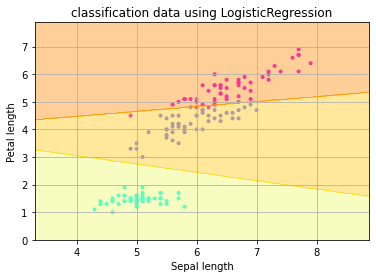

In [49]:
# パッケージをインポート
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# データを取得
iris = datasets.load_iris()
# irisの0列目と2列目を格納
X = iris.data[:, [0, 2]]
# irisのクラスラベルを格納
y = iris.target
# trainデータ、testデータの分割
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.3, random_state=42)

# ロジスティック回帰モデルの構築
model = LogisticRegression()
# train_Xとtrain_yを使ってモデルに学習
model.fit(train_X, train_y)
# test_Xに対するモデルの分類予測結果
y_pred = model.predict(test_X)
# print("train value     :"+ str(train_y))
print("Predicted value :"+ str(y_pred))
print("Correct data    :"+ str(test_y))
print("Acuraccy        : {} %".format(accuracy_score(test_y, y_pred)))
print("Precision       : {} %".format(precision_score(test_y, y_pred, average="micro")))
print("Recall          : {} %".format(recall_score(test_y, y_pred, average="micro")))
print("F-Value         : {} %".format(f1_score(test_y, y_pred, average="micro")))

# 以下可視化
# 全データを散布図にプロットし、ラベルごとに色を分ける
plt.scatter(X[:, 0], X[:, 1], c=y, marker=".",
            cmap=matplotlib.cm.get_cmap(name="cool"), alpha=1.0)
# グラフの範囲を決定
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# グラフを0.02ごとに区切った時の交点の座標を格納
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
# 全てのxx1,xx2のペアに対して、学習モデルで予測
plt.contourf(xx1, xx2, Z, alpha=0.4,
             cmap=matplotlib.cm.get_cmap(name="Wistia"))
# 座標(xx1, xx2)にZを描画
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.title("classification data using LogisticRegression")
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.grid(True)
plt.show()

## 線形SVM(Support Vector Machine)
データの境界線を見つけ、データの分類を行う手法

![](./images/svm.png)

- Pros
  - SVMは分類する境界線が2クラス間の最も離れた場所に引かれるため、ロジスティック回帰と比べて一般化されやすく、データの分類予測が向上する傾向がある
- Cons
  - データ量が増えると計算量が増えてしまうため、他の手法に比べ学習や予測が遅くなる傾向がある
  - ロジスティック回帰と同様に、入力データが線形分離可能でないと正しく分類が行えない

線形SVMは、scikit-learnのLinearSVC()で実装

Accuracy: 1.000
Accuracy: 1.000


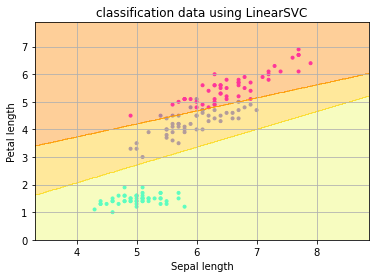

In [3]:
# パッケージをインポート
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.3, random_state=42)

# モデルの構築
model = LinearSVC(max_iter=10000)
# train_Xとtrain_yを使ってモデルに学習
model.fit(train_X, train_y)
# test_Xとtest_yを用いたモデルの正解率を出力
pred_y = model.predict(test_X)
print("Accuracy: {:.3f}".format(accuracy_score(test_y, pred_y)))
print("Accuracy: {:.3f}".format(model.score(test_X, test_y)))

# 以下可視化の作業
plt.scatter(X[:, 0], X[:, 1], c=y, marker=".",
            cmap=matplotlib.cm.get_cmap(name="cool"), alpha=1.0)

x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4,
             cmap=matplotlib.cm.get_cmap(name="Wistia"))
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.title("classification data using LinearSVC")
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.grid(True)
plt.show()

## 非線形SVM
入力データが線形分離でない限り使えないという欠点を持っていた</br>
非線形SVMは線形SVMの欠点を取り除くため開発されたモデル

![](./images/unlinear_svm.png)
カーネル関数と呼ばれる変換式に従って、数学的処理を行いデータを変換し、</br>
変換後の入力データが線形分離可能な状態となる場合がある</br>
この処理を行いSVMを用いるモデルが非線形SVM

カーネル関数による操作は複雑なのですが、その操作の計算を行わずともデータの操作後の内積が求められれば分類が可能なので、</br>
計算コストが抑えられます。この計算コストの抑制手法をカーネルトリックとも呼ばれる

SVMのモデルを作るにはscikit-learnのsvmサブモジュールにあるSVC()で実装


non-linear-SVM-score: 1.0
linear-SVM-score: 1.0


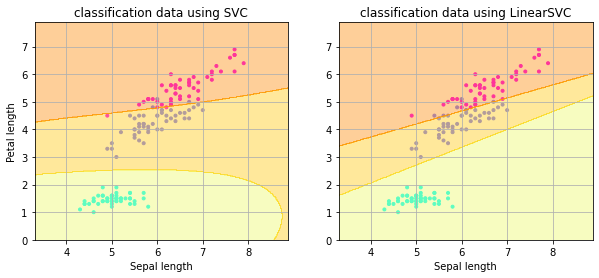

In [4]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_gaussian_quantiles
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# データの生成
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.3, random_state=42)

# モデルの構築
# 非線形SVMを実装
model1 = SVC() 
# 線形SVMを実装
model2 = LinearSVC(max_iter=10000)
# train_Xとtrain_yを使ってモデルに学習させる
model1.fit(train_X, train_y)
model2.fit(train_X, train_y)
# 正解率の算出
print("non-linear-SVM-score: {}".format(model1.score(test_X, test_y)))
print("linear-SVM-score: {}".format(model2.score(test_X, test_y)))

# 以下可視化の作業
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10, 4))
axL.scatter(X[:, 0], X[:, 1], c=y, marker=".",
            cmap=matplotlib.cm.get_cmap(name="cool"), alpha=1.0)
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z1 = model1.predict(
    np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
axL.contourf(xx1, xx2, Z1, alpha=0.4,
             cmap=matplotlib.cm.get_cmap(name="Wistia"))
axL.set_xlim(xx1.min(), xx1.max())
axL.set_ylim(xx2.min(), xx2.max())
axL.set_title("classification data using SVC")
axL.set_xlabel("Sepal length")
axL.set_ylabel("Petal length")
axL.grid(True)

axR.scatter(X[:, 0], X[:, 1], c=y, marker=".",
            cmap=matplotlib.cm.get_cmap(name="cool"), alpha=1.0)
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z2 = model2.predict(
    np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
axR.contourf(xx1, xx2, Z2, alpha=0.4,
             cmap=matplotlib.cm.get_cmap(name="Wistia"))
axR.set_xlim(xx1.min(), xx1.max())
axR.set_ylim(xx2.min(), xx2.max())
axR.set_title("classification data using LinearSVC")
axR.set_xlabel("Sepal length")
axR.grid(True)
plt.show()


## 決定木
決定木はこれまで紹介したロジスティック回帰やSVMとは違い、</br>
データの要素（説明変数）の一つ一つに着目し、</br>
その要素内でのある値を境にデータを分割し、データの属するクラスを決定する手法</br>

- Pros
  - 説明変数の一つ一つが目的変数にどのくらいの影響を与えているのかを見れる
  - 分割を繰り返すことで枝分かれしていきますが、先に分割される条件に用いられる変数ほど影響力が大きいと捉えられる
- Cons
  - 線形分離不可能なデータは分類が難しい (例えば2次元データでは境界線が斜めに引けない)
  - 学習が教師データに寄りすぎる(汎化されない)

決定木を実装するにはscikit-learnのtreeサブモジュールにあるDecisionTreeClassifier()を用いて実装


正解率: 0.9555555555555556


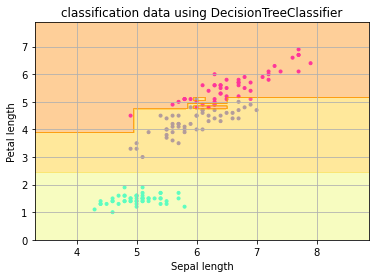

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import DecisionTreeClassifier

# データの生成
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.3, random_state=42)

# モデルの構築
model = DecisionTreeClassifier()
# モデルを学習
model.fit(train_X, train_y)
# test_Xとtest_yを用いたモデルの正解率を出力
print("正解率: {}".format(model.score(test_X, test_y)))
# 以下可視化
plt.scatter(X[:, 0], X[:, 1], c=y, marker=".",
            cmap=matplotlib.cm.get_cmap(name="cool"), alpha=1.0)

x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4,
             cmap=matplotlib.cm.get_cmap(name="Wistia"))
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.title("classification data using DecisionTreeClassifier")
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.grid(True)
plt.show()

## ランダムフォレスト
前述の決定木の簡易版のモデルを複数作り、分類の結果をモデルの多数決で決める手法</br>
複数の簡易分類器を一つの分類器にまとめて学習させる アンサンブル学習と呼ばれる学習の手法</br>

決定木では全ての説明変数を使用していたのに対し、ランダムフォレストの一つ一つの決定木は、</br>
ランダムに決められた少数の説明変数だけ使用してデータの属するクラスを決定</br>
その上で、複数の簡易決定木のモデルから出力されるクラスのうち、最も多いクラスを結果として出力

- Pros
  - 線形分離可能でない複雑な識別範囲を持つデータ集合の分類にも使える
- Cons
  - 決定木と同じように、説明変数の数に対してデータの数が少ないと決定木の分割ができず、予測の精度が下がってしまう

scikit-learnのensembleサブモジュールにあるRandomForestClassifier()を用いて実装

Random forest: 0.9555555555555556
Decision tree: 1.0


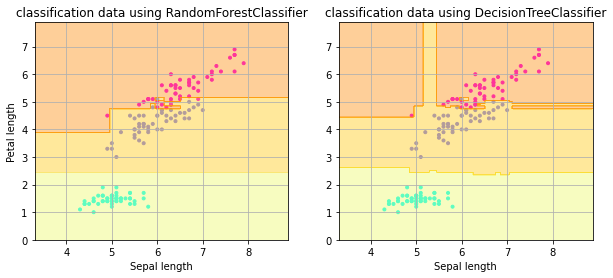

In [12]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# データの生成
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.3, random_state=42)

# モデルの構築
model1 = DecisionTreeClassifier()
model2 = RandomForestClassifier()

# モデルの学習
model1.fit(train_X, train_y)
model2.fit(train_X, train_y)

# 正解率を算出
print("Random forest: {}".format(model1.score(test_X, test_y)))
print("Decision tree: {}".format(model2.score(test_X, test_y)))

# 以下可視化作業です
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10, 4))
axL.scatter(X[:, 0], X[:, 1], c=y, marker=".",
            cmap=matplotlib.cm.get_cmap(name="cool"), alpha=1.0)
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z1 = model1.predict(
    np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
axL.contourf(xx1, xx2, Z1, alpha=0.4,
             cmap=matplotlib.cm.get_cmap(name="Wistia"))
axL.set_xlim(xx1.min(), xx1.max())
axL.set_ylim(xx2.min(), xx2.max())
axL.set_title("classification data using RandomForestClassifier")
axL.set_xlabel("Sepal length")
axL.set_ylabel("Petal length")
axL.grid(True)

axR.scatter(X[:, 0], X[:, 1], c=y, marker=".",
            cmap=matplotlib.cm.get_cmap(name="cool"), alpha=1.0)
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z2 = model2.predict(
    np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
axR.contourf(xx1, xx2, Z2, alpha=0.4,
             cmap=matplotlib.cm.get_cmap(name="Wistia"))
axR.set_xlim(xx1.min(), xx1.max())
axR.set_ylim(xx2.min(), xx2.max())
axR.set_title("classification data using DecisionTreeClassifier")
axR.set_xlabel("Sepal length")
axR.grid(True)
plt.show()

## k-NN
k近傍法とも呼ばれ、予測をするデータと類似したデータをいくつか見つけ、多数決により分類結果を決める手法</br>
怠惰学習と呼ばれる学習の種類の一手法であり、学習コスト（学習にかかる計算量）が0なのが特徴</br>
k-NNは教師データから学習するわけではなく、予測時に教師データを直接参照してラベルを予測

### 結果の予測フロー
1. 教師データを予測に用いるデータとの類似度で並べ直す
2. 分類器に設定されたk個分のデータを類似度の高い順に参照する
3. 参照された教師データが属するクラスのなかで最も多かったものを予測結果として出力する

- Pros
  - 学習コストが0
  - アルゴリズムとしては比較的単純だが高い予測精度が出やすい点
  - 複雑な形の境界線も表現しやすい点
- Cons
  - 分類器に指定する自然数kの個数を増やしすぎると、識別範囲の平均化が進み、予測精度が下がってしまう点
  - 予測時に毎回計算を行うため、教師データや予測データの量が増えると計算量が増えてしまい、低速なアルゴリズムとなってしまう点


以下の画像は、kkの数の違いによる分類過程の様子の違いを表してしまう</br>
灰色の点は、k=3では水色の点の方が周りに多いため、水色の点だと予測されますが、 </br>
k=7では緑色の点の方が多いため、緑色の点ではないかという予測に変わる</br>

![](./images/pie.svg)

0.9777777777777777


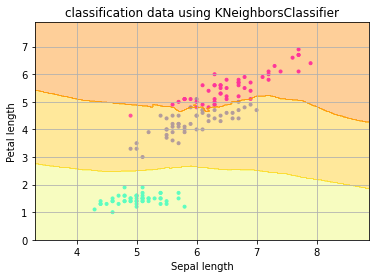

In [13]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.neighbors import KNeighborsClassifier

# データの生成
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.3, random_state=42)

# モデルの構築
model = KNeighborsClassifier()

# モデルの学習
model.fit(train_X, train_y)

# 正解率の表示
print(model.score(test_X, test_y))

# 以下可視化
plt.scatter(X[:, 0], X[:, 1], c=y, marker=".",
            cmap=matplotlib.cm.get_cmap(name="cool"), alpha=1.0)

x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=matplotlib.cm.get_cmap(name="Wistia"))
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.title("classification data using KNeighborsClassifier")
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.grid(True)
plt.show()

# ハイパーパラメーターとチューニング1
機械学習ではすべての学習過程を自動化することは難しく、人の手でモデルを調整しなければならない場合が存在する</br>
ハイパーパラメーターとは、機械学習のモデルが持つパラメーターの中で人が調整をしないといけないパラメーターを指す</br>
ハイパーパラメーターは選択した手法によって異なる


## チューニング
ハイパーパラメーターの調整をチューニングと呼ぶ</br>
調整方法は、値をモデルに直接入力する方法以外に、ハイパーパラメーターの値の範囲を指定し、最適な値を探す方法も存在する</br>
scikit-learnでは、モデルの構築時にパラメーターに値を入力することで、パラメーターのチューニングが可能


## ロジスティック回帰チューニング
### パラメーター C
ロジスティック回帰にはCというパラメーターが存在する</br>
このCは、教師データの分類の間違いに対して、モデルが学習する識別境界線をどのくらい厳しくするのかという指標になる

Cの値が大きいほど、モデルは教師データを完全に分類できるような識別線を学習するようになる</br>
しかし、教師データに対しては過学習になり、訓練データ以外のデータに予測を行うと、正解率が下がる場合が多くなる</br>

Cの値を小さくすると、教師データの分類の誤りと外れ値データに寛容になり、より一般化された境界線を得やすくなる</br>
ただし、外れ値の少ないデータでは、境界線がうまく識別できていないモデルになる場合もある</br>

note: scikit-learnのロジスティック回帰モデルにおいて、Cの初期値は1.0


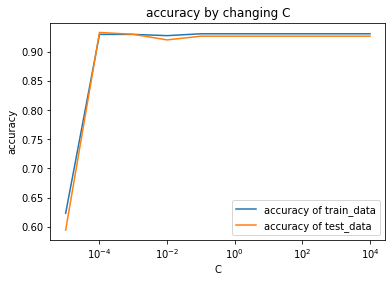

In [16]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# データの生成
X, y = make_classification(
    n_samples=1250, n_features=4, n_informative=2, n_redundant=2, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# Cの値の範囲を設定(今回は1e-5,1e-4,1e-3,0.01,0.1,1,10,100,1000,10000)
C_list = [10 ** i for i in range(-5, 5)]

# グラフ描画用の空リストを用意
train_accuracy = []
test_accuracy = []

for C in C_list:
    model = LogisticRegression(C=C, random_state=0)
    model.fit(train_X, train_y)
    train_accuracy.append(model.score(train_X, train_y))
    test_accuracy.append(model.score(test_X, test_y))
    
# グラフの準備
# semilogx()はxのスケールを10のx乗のスケールに変更
plt.semilogx(C_list, train_accuracy, label="accuracy of train_data")
plt.semilogx(C_list, test_accuracy, label="accuracy of test_data")
plt.title("accuracy by changing C")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend()
plt.show()

### パラメーター penalty
Cが分類の誤りの許容度だったのに対し、penaltyはモデルの複雑さに対するペナルティ</br>
penaltyに入力できる値は、「L1」と「L2」の2つあり、</br>
基本的には「L2」を選ぶが、「L1」を選んだほうが欲しいデータが得られる場合もある

- L1
  - データの特徴量の削減により、識別境界線の一般化を図るペナルティ
- L2
  - データ全体の重みの減少により、識別境界線の一般化を図るペナルティ


[0.9306296691568837, 0.9306296691568837, 0.9306296691568837, 0.9306296691568837, 0.9306296691568837, 0.9316969050160085, 0.9316969050160085, 0.9316969050160085, 0.9316969050160085, 0.9316969050160085, 0.9316969050160085, 0.9316969050160085, 0.9316969050160085]
[0.9265175718849841, 0.9265175718849841, 0.9265175718849841, 0.9265175718849841, 0.9265175718849841, 0.9265175718849841, 0.9265175718849841, 0.9265175718849841, 0.9265175718849841, 0.9265175718849841, 0.9265175718849841, 0.9265175718849841, 0.9265175718849841]


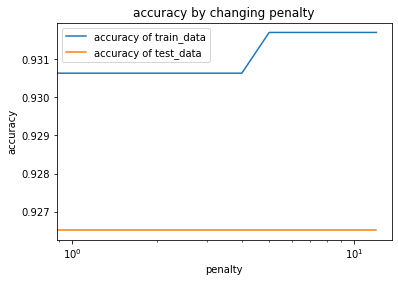

In [49]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# データの生成
X, y = make_classification(
    n_samples=1250, n_features=4, n_informative=2, n_redundant=2, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# penaltyを各種設定
penaltys = ["none", "l1", "l2"]
for i in range(10):
    penaltys.append("elastic_net_0.{}".format(i))

# グラフ描画用の空リストを用意
train_accuracy = []
test_accuracy = []

for penalty in penaltys:
    if penalty == "l1":
        model = LogisticRegression(penalty=penalty, solver="liblinear", random_state=0)
    elif penalty == "none" or penalty == "l2":
        model = LogisticRegression(penalty=penalty, random_state=0)
    else:
        model = LogisticRegression(penalty="elasticnet", l1_ratio=float(penalty[-3:]), max_iter=10000, solver="saga", random_state=0)
    model.fit(train_X, train_y)
    train_accuracy.append(model.score(train_X, train_y))
    test_accuracy.append(model.score(test_X, test_y))
    
# グラフの準備
# semilogx()はxのスケールを10のx乗のスケールに変更
print(train_accuracy)
print(test_accuracy)
plt.semilogx(penaltys, train_accuracy, label="accuracy of train_data")
plt.semilogx(penaltys, test_accuracy, label="accuracy of test_data")
plt.title("accuracy by changing penalty")
plt.xlabel("penalty")
plt.ylabel("accuracy")
plt.legend()
plt.show()

### パラメーター multi_class
multi_classは多クラス分類を行う際にモデルがどういった動作を行うか決めるパラメーター

- ovr
  - クラスに対して「属する/属さない」の二値分類の問題に適している
- multinomial
  - 各クラスに分類される確率も考慮され、「属する/属さない」だけではなく「どれくらい属する可能性があるか」を扱う問題に適している


### パラメーター random_state
random_stateは、その順番を制御するためのパラメーター</br>
ロジスティック回帰モデルの場合、データの処理順によって大きく境界線が変わる場合がある
random_stateの値を固定することにより、同じデータの学習結果を出力できる


## 線分SVMチューニング
### パラメーター C
ロジスティック回帰と同様に、分類の誤りの許容度を示すパラメーターCが定義されていて、同じ使い方</br>
線分SVMはロジスティック回帰に比べて、Cによるデータのラベルにおける予測精度の変動が激しくなる</br>
線分SVMのアルゴリズムはロジスティック回帰に比べて、より汎化された境界線を得るため、</br>
誤りの許容度が上下するとサポートベクターが変化し、正解率が変動

線形SVMモデルでは、Cの初期値は1.0。モジュールはLinearSVCを利用

/Users/k-kakimoto/dev/python-math/.ven/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/k-kakimoto/dev/python-math/.ven/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/k-kakimoto/dev/python-math/.ven/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/k-kakimoto/dev/python-math/.ven/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


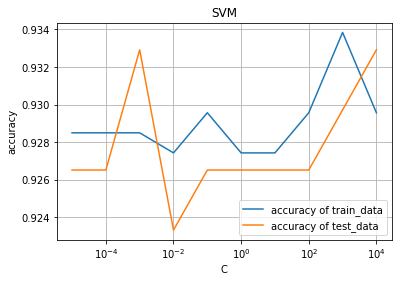

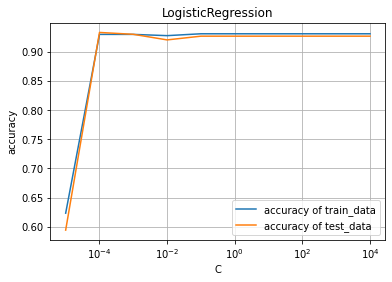

In [53]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# データの生成
X, y = make_classification(
    n_samples=1250, n_features=4, n_informative=2, n_redundant=2, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# Cの値の範囲を設定(今回は1e-5,1e-4,1e-3,0.01,0.1,1,10,100,1000,10000)
C_list = [10 ** i for i in range(-5, 5)]

# グラフ描画用の空リストを用意
svm_train_accuracy = []
svm_test_accuracy = []
log_train_accuracy = []
log_test_accuracy = []

for C in C_list:
    # 線形SVMのモデルを構築
    model1 = LinearSVC(C=C, random_state=0, max_iter=10000)
    model1.fit(train_X, train_y)
    svm_train_accuracy.append(model1.score(train_X, train_y))
    svm_test_accuracy.append(model1.score(test_X, test_y))
    # ロジスティック回帰のモデルを構築
    model2 = LogisticRegression(C=C, random_state=0, max_iter=10000)
    model2.fit(train_X, train_y)
    log_train_accuracy.append(model2.score(train_X, train_y))
    log_test_accuracy.append(model2.score(test_X, test_y))
    
# グラフの準備
# semilogx()はxのスケールを10のx乗のスケールに変更
fig = plt.figure()
plt.subplots_adjust(wspace=0.4, hspace=0.4)
ax = fig.add_subplot(1, 1, 1)
ax.grid(True)
ax.set_title("SVM")
ax.set_xlabel("C")
ax.set_ylabel("accuracy")
ax.semilogx(C_list, svm_train_accuracy, label="accuracy of train_data")
ax.semilogx(C_list, svm_test_accuracy, label="accuracy of test_data")
ax.legend()
ax.plot()
plt.show()
fig2 =plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)
ax2.grid(True)
ax2.set_title("LogisticRegression")
ax2.set_xlabel("C")
ax2.set_ylabel("accuracy")
ax2.semilogx(C_list, log_train_accuracy, label="accuracy of train_data")
ax2.semilogx(C_list, log_test_accuracy, label="accuracy of test_data")
ax2.legend()
ax2.plot()
plt.show()

### パラメーター penalty
線分SVMにもロジスティック回帰と同様に、penaltyのパラメーター</br>
設定できる値も同じく、"L1"と"L2"

- L1
  - データの特徴量の削減により、識別境界線の一般化を図るペナルティ
- L2
  - データ全体の重みの減少により、識別境界線の一般化を図るペナルティ

### パラメーター multi_class
multi_classは、多項分類を行う際にモデルがどういった動作を行うかを決めるパラメーター</br>
線形SVMでは、「ovr」と「crammer_singer」の2つの値が用意されていて、</br>
基本的にはovrの方が、動作が軽く、良い結果が出る

### パラメーター random_state
結果の固定(乱数の固定)に用いられるrandom_stateは、SVMの場合、サポートベクターの決定にも関わる

## 非線分SVMチューニング
### パラメーター C
非線形SVMではCを調整し、学習時に分類の誤りをどの程度許容するかを制御


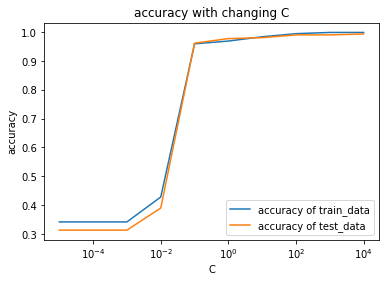

In [54]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_gaussian_quantiles
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# データの生成
X, y = make_gaussian_quantiles(n_samples=1250, n_features=2, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# Cの値の範囲を設定(今回は1e-5,1e-4,1e-3,0.01,0.1,1,10,100,1000,10000)
C_list = [10 ** i for i in range(-5, 5)]

# グラフ描画用の空リストを用意
train_accuracy = []
test_accuracy = []
for C in C_list:
    model = SVC(C=C, random_state=0)
    model.fit(train_X, train_y)
    train_accuracy.append(model.score(train_X, train_y))
    test_accuracy.append(model.score(test_X, test_y))
# グラフの準備
# semilogx()はxのスケールを10のx乗のスケールに変更
plt.semilogx(C_list, train_accuracy, label="accuracy of train_data")
plt.semilogx(C_list, test_accuracy, label="accuracy of test_data")
plt.title("accuracy with changing C")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend()
plt.show()

### パラメーター kernel
kernelは、非線形SVMの中でも特に重要なパラメーター</br>
受け取ったデータを操作して、分類しやすい形にするための関数を定義</br>

kernelは、linear、rbf、poly、sigmoid、precomputedを設定可能
デフォルト=rbf

- linear
  - 線形SVMであり、LinearSVCとほぼ同じ
  - 特殊な理由がない限りは、LinearSVCを使用すること
- rdf 
- poly
  - 立体投影のようなもの
  - rbfは他のものに比べ、比較的高い正解率が出ることが多いので、通常はデフォルトであるrbfを使用
- sigmoid
  - ロジスティック回帰モデルと同じ処理
- precomputed
  - データが前処理によって、すでに整形済みの場合に用いる


### パラメーター decision_function_shape
decision_function_shapeは、SVCにおけるmulti_classパラメーターのようなもの

- ovo
  - クラス同士のペアを作り、そのペアでの二項分類を行い、多数決で属するクラスを決定
  - ovoは計算量が多いため、データ量が増大すると動作が重くなる
- ovr
  - 1つのクラスとそれ以外を分類し、多数決で属するクラスを決定

### パラメーター random_state
random_stateはデータの処理順に関係するパラメーター</br>
予測結果を再現するために、学習の段階では固定を推奨


In [55]:
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# データの生成
X, y = make_classification(
    n_samples=1250, n_features=4, n_informative=2, n_redundant=2, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# 乱数生成器の構築
random_state = np.random.RandomState()
# モデルの構築
model = SVC(random_state=random_state)
# モデルの学習
model.fit(train_X, train_y)
# テストデータに対する正解率を出力
print(model.score(test_X, test_y))

0.9488817891373802


# ハイパーパラメーターとチューニング2
## 決定木
### パラメーター max_depth
max_depthは、モデルが学習する木の深さの最大値のパラメーター</br>
max_depthの値を設定しないと、木は教師データを正しく分類できるまで、データを分割し続ける</br>
この結果、教師データに過剰に適合した、一般性の低いモデルが作成されることがある</br>
max_depthの値が大きすぎても、分類が終了した段階で木の成長は止まるため、上記と同じ状態になる

max_depth の設定による木の深さや制限を、「決定木の枝刈り」と呼ぶ

### パラメーター random_state
random_stateは、決定木の学習過程に関わるパラメーター</br>
決定木は、分割を行う時点で、データの分類を説明できる要素の値を見つける。</br>
しかし、データの分類を説明できる要素の値は、多くの候補が存在する</br>
そのため、random_state で乱数の生成の固定することにより、出力結果を一定化</br>

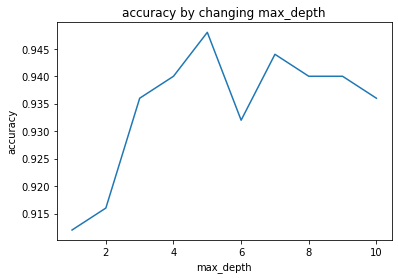

In [56]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# データの生成
X, y = make_classification(
    n_samples=1000, n_features=5, n_informative=3, n_redundant=0, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# max_depthの値の範囲(1から10)
depth_list = [i for i in range(1, 11)]

# 正解率を格納する空リストを作成
accuracy = []

# max_depthを変えながらモデルを学習
for max_depth in depth_list:
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(train_X, train_y)
    accuracy.append(model.score(test_X, test_y))

# グラフのプロット
plt.plot(depth_list, accuracy)
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.title("accuracy by changing max_depth")
plt.show()

## ランダムフォレストのハイパーパラメーター
### パラメーター n_estimators
ランダムフォレストの特徴として、複数の簡易決定木による多数決で結果が決定される</br>
その簡易決定木の個数を決めるのが、このn_estimatorsというパラメーター

### パラメーター max_depth
max_depthは、簡易決定木の深さを指定するパラメーター</br>
パラメータの指定により、個々の決定木の過学習を防ぐ



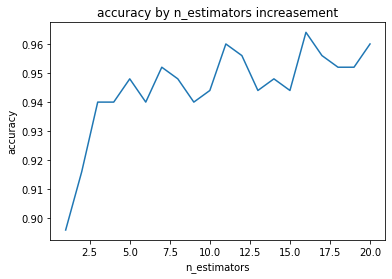

In [57]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# データの生成
X, y = make_classification(
    n_samples=1000, n_features=4, n_informative=3, n_redundant=0, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# n_estimatorsの値の範囲(1から20)
n_estimators_list = [i for i in range(1, 21)]

# 正解率を格納する空リストを作成
accuracy = []
# n_estimatorsを変えながらモデルを学習
for n_estimators in n_estimators_list:
    model = RandomForestClassifier(n_estimators=n_estimators)
    model.fit(train_X, train_y)
    accuracy.append(model.score(test_X, test_y))

# グラフのプロット
plt.plot(n_estimators_list, accuracy)
plt.title("accuracy by n_estimators increasement")
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.show()

### パラメーター random_state
random_stateは、学習に用いるデータの順番を固定する重要なパラメーター</br>
下のコードは、実際にrandom_stateを変更した際に、スコアにどれだけのバラツキが出るかを表現した

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# データの生成
X, y = make_classification(
    n_samples=1000, n_features=4, n_informative=3, n_redundant=0, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# r_seedsの値の範囲(0から99)
r_seeds = [i for i in range(100)]

# 正解率を格納する空リストを作成
accuracy = []
# random_stateを変えながらモデルを学習
for seed in r_seeds:
    model = RandomForestClassifier(random_state=seed)
    model.fit(train_X, train_y)
    accuracy.append(model.score(test_X, test_y))

# グラフのプロット
plt.plot(r_seeds, accuracy)
plt.xlabel("seed")
plt.ylabel("accuracy")
plt.title("accuracy by changing seed")
plt.show()

## k-NN
### パラメーター n_neighbors
k近傍法（k-NN）とは、分類したい未知のデータの近くにあるデータからラベルを予測するアルゴリズム</br>
n_neighbors の数が多すぎると、データの類似度に幅が出るため、分類範囲の狭いカテゴリーではうまく分類されない場合がある



In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# データの生成
X, y = make_classification(
    n_samples=1000, n_features=4, n_informative=3, n_redundant=0, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# n_neighborsの値の範囲(1から10)
k_list = [i for i in range(1, 11)]

# 正解率を格納する空リストを作成
accuracy = []
# n_neighborsを変えながらモデルを学習
for k in k_list:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(train_X, train_y)
    accuracy.append(model.score(test_X, test_y))

# グラフのプロット
plt.plot(k_list, accuracy)
plt.xlabel("n_neighbor")
plt.ylabel("accuracy")
plt.title("accuracy by changing n_neighbor")
plt.show()

# チューニングの自動化
主要な手法の中で、よく使われるパラメーターを紹介したが、</br>
これら全てのパラメーターを都度変えて、結果を確認するのは時間と手間がかかる

そこで、パラメーターの範囲を指定して、精度の良いパラメーターセットを計算機に見つけてもらうという方法を使う

## グリッドサーチ
- 調整したいハイパーパラメーターの値の候補を、明示的に複数指定してパラメーターセットを作成
- モデルの評価を繰り返すことにより、最適なパラメーターセットが作成

In [59]:
import scipy.stats
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_digits()
train_X, test_X, train_y, test_y = train_test_split(data.data, data.target, random_state=42)

# パラメーターの値の候補を設定
model_param_set_grid = {SVC(): {"kernel": ["linear", "poly", "rbf", "sigmoid"],
                                "C": [10 ** i for i in range(-5, 5)],
                                "decision_function_shape": ["ovr", "ovo"],
                                "random_state": [42]}}
              
max_score = 0
best_param = None

# グリッドサーチでパラメーターを探索
for model, param in model_param_set_grid.items():
    clf = GridSearchCV(model, param)
    clf.fit(train_X, train_y)
    pred_y = clf.predict(test_X)
    score = accuracy_score(test_y, pred_y)
    if max_score < score:
        max_score = score
        best_param = clf.best_params_
                        
print("パラメーター:{}".format(best_param))
print("ベストスコア:",max_score)
svm = SVC()
svm.fit(train_X, train_y)
print()
print('調整なし')
print(svm.score(test_X, test_y))


パラメーター:{'C': 10, 'decision_function_shape': 'ovr', 'kernel': 'rbf', 'random_state': 42}
ベストスコア: 0.9888888888888889

調整なし
0.9866666666666667


## ランダムサーチ
ランダムサーチはパラメーターが取りうる値の範囲を指定し、</br>
確率で決定されたパラメーターセットを用いてモデルの評価を行うことを繰り返し、</br>
最適なパラメーターセットを探す方法</br>

- 値の候補を明示的に指定するため、パラメーターの値に文字列や整数、True or Falseといった数学的に連続ではない値をとるパラメーターの探索に向いている
- パラメーターの候補を網羅するようにパラメーターセットが作成されるため、多数のパラメーターを同時にチューニングするのは不向き


In [60]:
import scipy.stats
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_digits()
train_X, test_X, train_y, test_y = train_test_split(data.data, data.target, random_state=42)

# パラメーターの値の候補を設定
model_param_set_random =  {SVC(): {
        "kernel": ["linear", "poly", "rbf", "sigmoid"],
        "C": scipy.stats.uniform(0.00001, 1000),
        "decision_function_shape": ["ovr", "ovo"],
        "random_state": [42]}}

max_score = 0
best_param = None

# ランダムサーチでパラメーターを探索
for model, param in model_param_set_random.items():
    clf = RandomizedSearchCV(model, param)
    clf.fit(train_X, train_y)
    pred_y = clf.predict(test_X)
    score = accuracy_score(test_y, pred_y)
    if max_score < score:
        max_score = score
        best_param = clf.best_params_
        
print("パラメーター:{}".format(best_param))
print("ベストスコア:",max_score)
svm = SVC()
svm.fit(train_X, train_y)
print()
print('調整なし')
print(svm.score(test_X, test_y))


パラメーター:{'C': 132.08173719499345, 'decision_function_shape': 'ovr', 'kernel': 'rbf', 'random_state': 42}
ベストスコア: 0.9888888888888889

調整なし
0.9866666666666667
